Training time: 0.0
R-squared (Accuracy): 0.8014008119963292


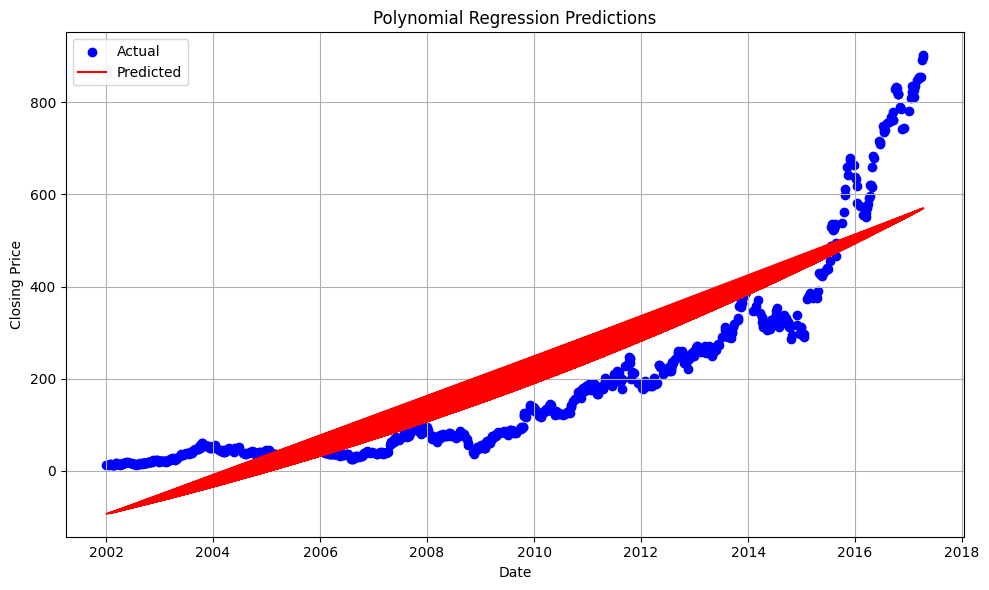

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('amazon.csv')

# Step 2: Preprocess the data
dates = pd.to_datetime(data.iloc[:, 0])  # Convert the first column to datetime
closing_prices = data.iloc[:, -2]  # Assuming the last but one column represents the closing price

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dates, closing_prices, test_size=0.2, random_state=42)

# Step 4: Train the polynomial regression model
start_time = time.time()
degree = 3  # Set the degree of polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(np.array(X_train).reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
end_time = time.time()
training_time = end_time - start_time

# Step 5: Test the model and calculate R-squared
X_test_poly = poly_features.transform(np.array(X_test).reshape(-1, 1))
y_pred = poly_model.predict(X_test_poly)
r_squared = r2_score(y_test, y_pred)

# Step 6: Print time and accuracy
print('Training time:', training_time)
print('R-squared (Accuracy):', r_squared)

# Step 7: Plot the curve of actual vs. predicted closing prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Polynomial Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
